In [2]:
import tifffile as t
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import random
import zarr
%matplotlib inline

In [3]:
path = "./Sample_03/"
image_path = './croped.tif'
image_path

'./croped.tif'

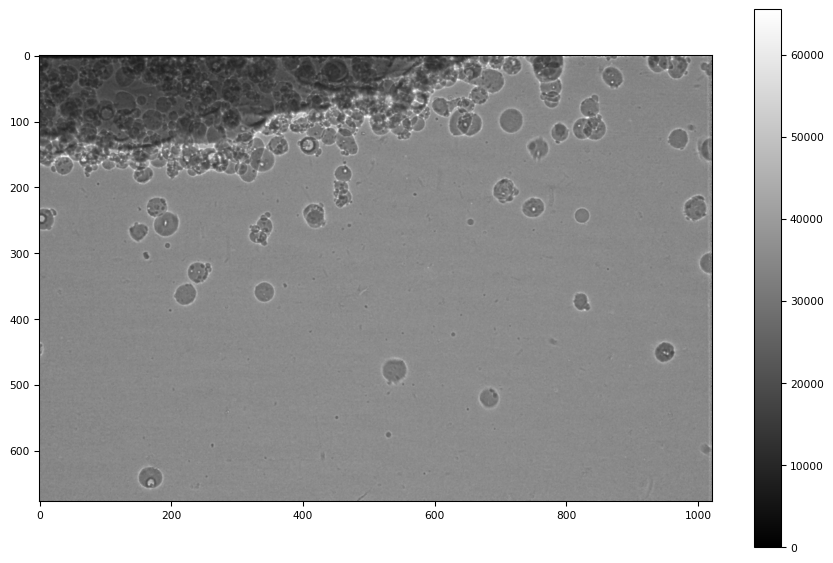

dtype('<u2')

In [4]:
image = t.imread(image_path)
hist = cv2.calcHist([image],[0],None,[65535],[0,65535])


t.imshow(image, cmap='gray')

plt.show()
image.dtype

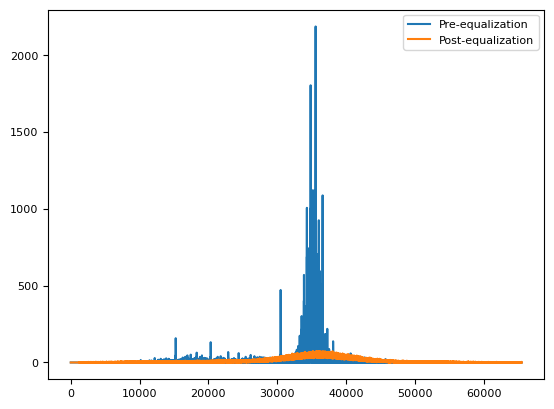

In [5]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
eq_img = clahe.apply(image)

# t.imshow(eq_img, cmap='gray')
eq_hist = cv2.calcHist([eq_img],[0],None,[65535],[0,65535])
plt.plot(hist, label="Pre-equalization")
plt.plot(eq_hist, label="Post-equalization")
plt.legend()
plt.show()
bit8 = cv2.convertScaleAbs(eq_img, alpha=255/eq_img.max())

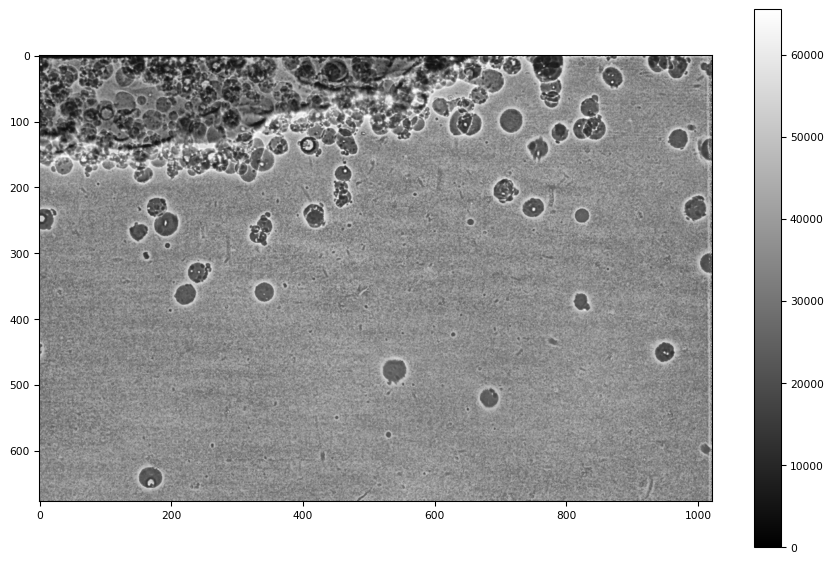

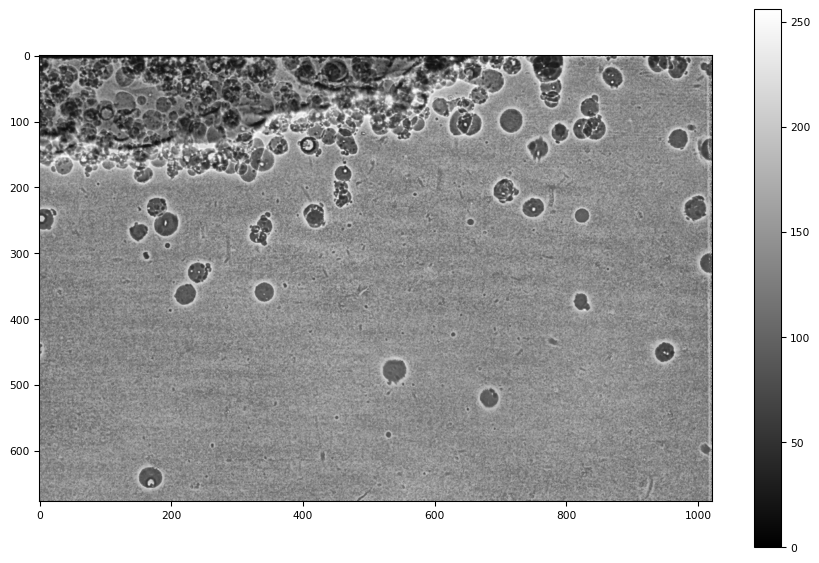

In [6]:
t.imshow(eq_img, cmap='gray')
t.imshow(bit8, cmap='gray')
plt.show()
# t.imsave('./cropped_8b.tif', cv2.convertScaleAbs(image, alpha=255/image.max()))

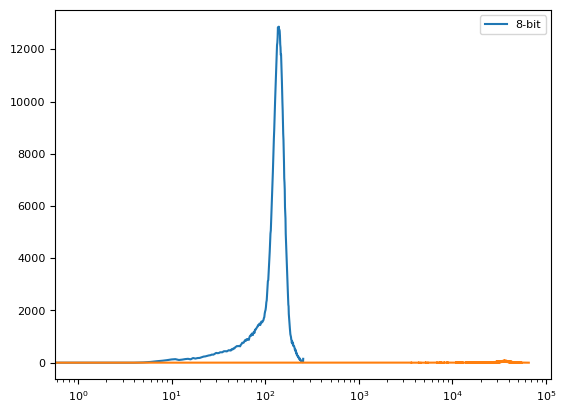

In [7]:
hits8 = cv2.calcHist([bit8],[0],None,[256],[0,256])
plt.plot(hits8, label="8-bit")
plt.plot(eq_hist)
plt.xscale('log')
plt.legend()

In [8]:
!pip install zarr
import zarr

In [9]:

with t.TiffSequence('./Sample_03/*.tif') as imseq:
    # create a for loop that plots at each iteration one slice of the volume of imseq
    vol = imseq.aszarr()
    print(zarr.open(vol))

<zarr.core.Array (97, 1000, 1024) uint16>
